<a href="https://colab.research.google.com/github/SuyoungPark11/ml_learning_project/blob/main/KERAS_Learning_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KERAS Learning v1
### 목표 
### 1. tf.keras 를 활용한 인공신경망(ANN) 구축하는 전반적인 과정 
### 2. tf.keras 를 활용한 모델 구현방법 3가지 (Sequential, Functional, Subclassing API)
### 3. 예제코드에 사용된 Layers 간단한 공부

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [3]:
# 기본 작업
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import requests
from konlpy.tag import Mecab
import numpy as np
import os
from tqdm import tqdm
train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv', encoding='utf-8').iloc[:, 1:]
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv', encoding='utf-8').iloc[:, 1:]
sample_submission = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sample_submission.csv', encoding = 'utf-8') 
# Data Cleansing
def clean_text(texts):
  corpus = []
  for i in range(0, len(texts)):
    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
    review = re.sub(r'\d+','', str(texts[i]))# remove number
    review = review.lower() #lower case
    review = re.sub(r'\s+', ' ', review) #remove extra space
    review = re.sub(r'<[^>]+>','',review) #remove Html tags
    review = re.sub(r'\s+', ' ', review) #remove spaces
    review = re.sub(r"^\s+", '', review) #remove space from start
    review = re.sub(r'\s+$', '', review) #remove space from the end
    corpus.append(review)
  return corpus
train.data = clean_text(train.data)
test.data = clean_text(test.data)
# 줄바꿈 제거
train_data_text = list(train['data'])
train_clear_text = []
for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train['clear_text'] = train_clear_text
# 특수기호 제거
train_clear_text = list(train['clear_text'])
train_clear_text2 = []
for text in train_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  train_clear_text2.append(temp)
train['clear_text'] = train_clear_text2
# test data cleansing
# 줄바꿈 제거
test_data_text = list(test['data'])
test_clear_text = []
for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test['clear_text'] = test_clear_text
test_clear_text = list(test['clear_text'])
# 특수기호 제거
test_clear_text2 = []
for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test['clear_text'] = test_clear_text2
# Preprocessing : 형태소 분석
mecab = Mecab()
# 불용어(stopword) 처리 - 인터넷 검색 시 사용하지 않는 단어 (관사, 전치사, 조사, 접속사 등)
stop_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/한국어불용어100.txt', sep='\t', header=None, names=['형태', '품사', '비율'])
stop_df.loc[len(stop_df)] = '가'
stop_df.loc[len(stop_df)] = '합니다'
stop_words = list(stop_df['형태'])
# Get nouns
X_train = []
text = list(train['clear_text'])
for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i])
  temp_X = [word for word in temp_X if not word in stop_words]
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)
X_test = []
text = list(test['clear_text'])
for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)
print(X_train[:5])
print(X_test[:5])

100%|██████████| 5000/5000 [00:10<00:00, 497.17it/s]

[['신혼', '부부', '주택', '정책', '보육', '시설', '국민', '세금', '일부', '정책', '보편', '국민', '수긍', '복지', '정책', '신혼', '부부', '당첨', '로또', '주택', '정책', '반대', '국민', '세금', '일부', '세금', '보육', '시설', '전국', '설치', '기업', '솔선수범', '사업장', '의무', '설치', '경력', '단절', '개인', '능력', '능력', '육아', '전담', '아이', '부모', '이제', '국가', '시대', '부동산', '가격', '정부', '정책', '부동산', '역효과'], ['학교', '이름', '남자', '울산', '중학교', '재학', '학생', '최근', '양성', '평등', '글짓기', '울산', '울산', '중학교', '남중', '여중', '학교', '남자', '우위', '학교', '울산', '중학교', '남중', '남자', '울산', '남자', '중학교', '평소', '학교', '이름', '학교', '여중', '남중', '동안', '현실', '이젠', '조선', '시대', '국내', '학교', '울산', '국내', '고등학교', '해결'], ['빙상', '연맹', '축구', '협회', '각종', '체육', '협회', '비리', '철저', '최근', '동계', '올림픽', '김보름', '박지우', '선수', '관련', '논란거리', '선수', '개개인', '이번', '빙상', '연맹', '합리', '행정', '불신', '동계', '올림픽', '폐막', '러시아', '월드컵', '축구', '대회', '월드컵', '시작', '감독', '선임', '선수', '선발', '우려', '목소리', '아시아', '최종', '예선', '기대', '이하', '경기력', '실망', '모습', '둘째', '슈틸리케', '감독', '경질', '리우', '올림픽', '감독', '신태용', '감독', '대표', '감독', '모습', '브라질', '월드컵', '런던', '올

# NLP by tf.keras
## 1) Preprocessing
##### - 단어집합 생성 및 정수 인코딩


## 2) Embedding
##### - 텍스트를 dense vector로 만드는 과정
##### - 전체 집합의 제한이 이쓴 one-hot-encoding 대신, 

## 3) Modeling
##### - 입력층 ~ 은닉층 ~ 출력층 구성
##### - 다양한 논문에 대해 학습이 필요, 또는 기존 학습된 모델들을 활용도 가능

## 4) Model Compile
##### - 위에서 만들어진 모델을 compile() 메서드를 호출
##### - loss function & optimizer 지정이 필요
##### - 'sgd' 같이 이름으로 지정, 또는 keras.optimizers.SGD()와 같이 keras 함수를 호출도 가능
##### - 세밀한 튜닝(e.g. learning rate in SGD)을 필요할 경우 함수로 호출

## 5) Training
##### - 컴파일한 모델에 fit() 메서드를 호출하여 훈련 실시
##### - 훈련 중 발생할 수 있는 여러 상황을 대비해서 Callback API 등을 살펴볼 예정

## 6) Prediction & Evaluation
##### - evaluate() 메서드를 활용해 훈련한 모델에 대한 평가 
##### - predict() 메서드를 활용해 훈련한 모델을 이용해 예측 수행
##### - save() 메서드를 활용해 훈련한 모델을 저장

In [4]:
# 1. Preprocessing
"""
* Tokenizer Class
tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    document_count=0,
    **kwargs
)
- num_words : 최대 단어 수. 보통 num_words-1 만큼 사용
- filters : 
- lower : boolean. 소문자로 변경
- split : 단어를 나눌 구분 단위
- char_level : True로 하면, 모든 문자를 토큰으로 취급
- oov_token : word index에 추가하여 out-of-vocabulary 대체
- 기본적으로 모든 구두점은 제거
- Tokenizer's new args : word_counts, word_docs, index_docs, word_index, index_word
- 단어 집합 생성 메서드 : fit_on_sequences([word_indices]), fit_on_texts(['string'])
- 시퀀스 변환 : sequences_to_texts([seq]), sequences_to_matrix([seq], mode='binary')
- 텍스트 변환 : texts_to_sequences(texts), texts_to_matrix(texts, mode='binary')
- 위 시퀀스 및 텍스트 변환에서 mode는 binary, count, tfidf, freq 중 선택
- JSON 읽기 : tf.keras.preprocessing.text.tokenizer_from_json(json_string)

"""
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [5]:
tokenizer.word_index

{'아이': 1,
 '학교': 2,
 '국민': 3,
 '학생': 4,
 '교육': 5,
 '나라': 6,
 '여성': 7,
 '선수': 8,
 '청원': 9,
 '국가': 10,
 '교사': 11,
 '대한민국': 12,
 '처벌': 13,
 '사건': 14,
 '폐지': 15,
 '대통령': 16,
 '정부': 17,
 '청소년': 18,
 '필요': 19,
 '이상': 20,
 '이유': 21,
 '부모': 22,
 '피해자': 23,
 '한국': 24,
 '인권': 25,
 '유치원': 26,
 '조사': 27,
 '방송': 28,
 '어린이집': 29,
 '지원': 30,
 '대학': 31,
 '남성': 32,
 '저희': 33,
 '제도': 34,
 '선생': 35,
 '상황': 36,
 '대표': 37,
 '관련': 38,
 '정책': 39,
 '범죄': 40,
 '내용': 41,
 '올림픽': 42,
 '남자': 43,
 '기사': 44,
 '반대': 45,
 '가족': 46,
 '피해': 47,
 '평등': 48,
 '축구': 49,
 '경찰': 50,
 '개인': 51,
 '사용': 52,
 '의무': 53,
 '게임': 54,
 '가해자': 55,
 '언론': 56,
 '이번': 57,
 '공부': 58,
 '문화': 59,
 '현실': 60,
 '감사': 61,
 '보호': 62,
 '초등': 63,
 '가능': 64,
 '뉴스': 65,
 '생활': 66,
 '마음': 67,
 '시험': 68,
 '폭력': 69,
 '감독': 70,
 '운영': 71,
 '평가': 72,
 '수업': 73,
 '가정': 74,
 '폭행': 75,
 '차별': 76,
 '수사': 77,
 '보육': 78,
 '엄마': 79,
 '자유': 80,
 '겁니다': 81,
 '자기': 82,
 '해결': 83,
 '수능': 84,
 '요청': 85,
 '기관': 86,
 '결과': 87,
 '누구': 88,
 '과정': 89,
 '이해': 90,
 '요구': 9

In [6]:
tokenizer.word_counts

OrderedDict([('신혼', 123),
             ('부부', 1233),
             ('주택', 469),
             ('정책', 5926),
             ('보육', 3842),
             ('시설', 1920),
             ('국민', 20762),
             ('세금', 2843),
             ('일부', 2599),
             ('보편', 235),
             ('수긍', 77),
             ('복지', 1862),
             ('당첨', 90),
             ('로또', 216),
             ('반대', 5193),
             ('전국', 1838),
             ('설치', 1114),
             ('기업', 2104),
             ('솔선수범', 24),
             ('사업장', 131),
             ('의무', 4803),
             ('경력', 776),
             ('단절', 306),
             ('개인', 4807),
             ('능력', 2061),
             ('육아', 2132),
             ('전담', 270),
             ('아이', 26327),
             ('부모', 7990),
             ('이제', 1209),
             ('국가', 13418),
             ('시대', 2455),
             ('부동산', 306),
             ('가격', 841),
             ('정부', 9441),
             ('역효과', 36),
             ('학교', 21780),
          

In [7]:
threshold = 11
total_cnt = len(tokenizer.word_index)
rare_cnt = 0   # threshold 보다 적게 등장하는 단어 수 
total_freq = 0 # 훈련 데이터의 전체 단어 빈도 합계
rare_freq = 0  # threshold보다 적게 등장하는 단어의 빈도 합계
# key : value = 단어 : 빈도
for key, value in tokenizer.word_counts.items():
  total_freq += value
  if (value < threshold) :
    rare_cnt += 1
    rare_freq += value
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print(vocab_size)

12621


In [8]:
"""
* to_categorical 함수
tf.keras.utils.to_categorical(
    y, num_classes=None, dtype='float32'
)
- binary class matrix로 변환
"""
from tensorflow.keras.utils import to_categorical
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)
# y 값 분리
y_train = to_categorical(np.array(train['category']))
print(y_train)
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]
# 빈 샘플 제거
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [12]:
"""
* pad_sequences 함수
tf.keras.preprocessing.sequence.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)
- 특정 형태의 2D Numpy array 변환
- 문장별로 다른 길이를 모델의 입력으로 사용하기 위해 길이를 맞추는 과정(padding)
- sequences : 패딩을 하기위한 데이터
- maxlen : 모든 데이터에 대해 정규화할 길이
- padding : 'pre'를 하면 앞에 0을, 'post'를 하면 뒤에 0을 채움 (Default='pre')
"""

from tensorflow.keras.preprocessing.sequence import pad_sequences

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 300
below_threshold_len(max_len, del_X_train)
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)
print(X_train[:1])
print(token_X_train[:1])
print(pad_X_train[:1])

전체 샘플 중 길이가 300 이하인 샘플의 비율: 97.22263924335685
[['신혼', '부부', '주택', '정책', '보육', '시설', '국민', '세금', '일부', '정책', '보편', '국민', '수긍', '복지', '정책', '신혼', '부부', '당첨', '로또', '주택', '정책', '반대', '국민', '세금', '일부', '세금', '보육', '시설', '전국', '설치', '기업', '솔선수범', '사업장', '의무', '설치', '경력', '단절', '개인', '능력', '능력', '육아', '전담', '아이', '부모', '이제', '국가', '시대', '부동산', '가격', '정부', '정책', '부동산', '역효과']]
[[3094, 421, 1133, 39, 78, 253, 3, 137, 160, 39, 1939, 3, 4165, 262, 39, 3094, 421, 3770, 2082, 1133, 39, 45, 3, 137, 160, 137, 78, 253, 265, 473, 228, 8131, 2951, 53, 473, 725, 1567, 51, 235, 235, 222, 1728, 1, 22, 427, 10, 175, 1568, 666, 17, 39, 1568, 6533]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     


# 이번 모델링에 사용된 Layers
### * Dense Layer
##### - 아래 연산을 수행
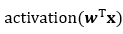
##### ref) https://keras.io/api/layers/core_layers/dense/

### * Embedding layer
##### - 단어를 밀집 벡터로 만드는 역할로 정수 인코딩이 된 단어들을 입력받아 임베딩

ref) https://keras.io/api/layers/core_layers/embedding/

### * Convolution layer
##### - NLP에서는 패딩한 1D Convlution을 활용할 수 있는데, 
##### - 커널의 크기는 n-gram이 달라지는 것과 유사

### * Pooling layer
##### - 계산량, 메모리 사용량, 파라미터 수를 줄이기 위해 입력의 축소본을 만드는 층
##### - 가중치가 없이 최대 / 평균 같은 함수를 이용해 입력값을 더하는 층


### * LSTM Cell (Long Short Term Memory)
##### - RNN에서는 데이터가 변환되므로 일부 정보가 매 훈련 스텝 후 사라지지만, LSTM은 네트워크가 장기 상태에 저장할 것, 버릴 것, 읽어들일 것을 학습

In [28]:
# 2. Modeling : Sequential API - 순서대로 연결된 층을 일렬로 쌓아서 구성
"""
* Dense
tf.keras.layers.Dense(
    units,                       # output 차원
    activation=None,             # 활성화 함수(softmax, tanh, sigmoid, relu 등)
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

* Embedding
tf.keras.layers.Embedding(
    input_dim,  # 입력 단어의 크기
    output_dim, # 임베딩 차원
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None, # 입력 시퀀스 길이
    **kwargs
)
- 어떤 양의 정수를 고정된 밀집벡터로 변환

* Conv1D
tf.keras.layers.Conv1D(
    filters,     # output 차원
    kernel_size, # window 크기
    strides=1,
    padding='valid',  # 'valid' 제로 패딩 사용x, 'same'은 제로 패딩 사용  
    data_format='channels_last',
    dilation_rate=1,
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

* GlobalMaxPooling1D
tf.keras.layers.GlobalMaxPool1D(
    data_format='channels_last', keepdims=False, **kwargs
)
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
# layers 에는 Embedding, Conv, MaxPooling 등이 있음 
model1 = Sequential()
model1.add(Embedding(vocab_size, 64, input_length=max_len))
model1.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(3, activation = 'softmax'))
"""
model1 = Sequential ([
  Embedding(vocab_size, 64, input_length=max_len),
  Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01)),
  GlobalMaxPooling1D(),
  Dense(3, activation = 'softmax')
])
"""
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 300, 64)           807744    
                                                                 
 conv1d_6 (Conv1D)           (None, 300, 64)           20544     
                                                                 
 global_max_pooling1d_6 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 828,483
Trainable params: 828,483
Non-trainable params: 0
_________________________________________________________________


# KERAS 구현 방식
## 1) Sequential API
##### - 단순하게 layer를 쌓는 방식으로 간단한 모델 구현
##### - add 또는 Sequential 내부의 리스트 형식으로 순차적으로 구현 가능
##### - 하지만, 다수의 입력/출력을 갖거나 cycle이 있는 등 층의 연결이 존재하는 복잡한 모델은 구현이 어려움
ref) https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
## 2) Functional API
##### - Sequential과 다르게 non-linear 모델도 유연하게 적용 가능
##### - (입력 shape를 명시한) input layer도 정의 필요
ref) https://www.tensorflow.org/guide/keras/functional
## 3) Subclassing API 
##### - 위 Sequential, Functional 두 API는 모두 정적인 프로그래밍
##### - Subclassing API는 동적인 구조(예를 들어, 반목문 적용 등), 더 복잡한 모델 프로그래밍 가능
ref) https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [30]:
# Functional API : non-linear, 다수의 입출력 등 복잡한 구조의 경우 사용
from tensorflow import keras
from tensorflow.keras.regularizers import l2

input_ = keras.layers.Input(shape=pad_X_train.shape[1:])
embedding = keras.layers.Embedding(vocab_size, 64, input_length=max_len)(input_)
conv1d = keras.layers.Conv1D(64, 5, activation='relu', padding='same', kernel_regularizer=l2(0.01))(embedding)
pool1d = keras.layers.GlobalMaxPooling1D()(conv1d)
output_ = keras.layers.Dense(3, activation='softmax')(pool1d)
model1_fapi = keras.Model(inputs=[input_], outputs=[output_])
model1_fapi.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_12 (Embedding)    (None, 300, 64)           807744    
                                                                 
 conv1d_8 (Conv1D)           (None, 300, 64)           20544     
                                                                 
 global_max_pooling1d_8 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 828,483
Trainable params: 828,483
Non-trainable params: 0
_____________________________________________________

In [24]:
# Subclassing API : 어느 상황에서나 사용가능한 동적인 구조를 만들어야 할 경우
from tensorflow import keras
from tensorflow.keras.regularizers import l2

class Model1(keras.Model):
  def __init__(self): # 생성자(constructor)에 필요한 층 만들기
    super().__init__()
    self.embedding = keras.layers.Embedding(vocab_size, 64, input_length=max_len)
    self.conv1d = keras.layers.Conv1D(64, 5, activation='relu', padding='same', kernel_regularizer=l2(0.01)) 
    self.pool1d = keras.layers.GlobalMaxPooling1D()
    self.dense = keras.layers.Dense(3, activation='softmax')

  def call(self, inputs): # call 메서드 안에서 어떠한 연산도 구현 가능
    embedding = self.embedding(inputs)
    conv1d = self.conv1d(embedding)
    pool1d = self.pool1d(conv1d)
    return self.dense(pool1d)  

model1_sapi = Model1()
model1_sapi(pad_X_train)
model1_sapi.summary()

Model: "model1_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     multiple                  807744    
                                                                 
 conv1d_5 (Conv1D)           multiple                  20544     
                                                                 
 global_max_pooling1d_5 (Glo  multiple                 0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             multiple                  195       
                                                                 
Total params: 828,483
Trainable params: 828,483
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 3. Model 컴파일 : optimizer와 손실함수(loss)를 지정
"""
Model methods
* compile
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
- metrics : output이 여러개면, dictionary 또는 list 사용 가능

* fit
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None, # 
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
- class_weight : 훈련세트가 편중되어 있다면, 적은 쪽에 높은 가중치를 부여해 해결
- 검증 데이터를 활용 : validation_data(X_val, y_val), validation_spit=integer
"""
from tensorflow.keras.optimizers import RMSprop
model1.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy', metrics=['acc'])

# 4. Model 훈련
"""
Callbacks API : 훈련 중에 할 수 있는 액션들
* ModelCheckpoint : 훈련 중에 모델 / 가중치를 checkpoint 파일에 저장
* EarlyStopping : 측정지표 개선이 한계에 도달하면 멈춤
* ReduceLROnPlateau : 측정지표 개선이 멈추면 learning rate 감소
"""
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reLR = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 2)
mc = ModelCheckpoint(filepath = '1028_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64, shuffle = True, validation_split=0.2, verbose = 1, callbacks=[es, mc, reLR])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.5671 - acc: 0.8056
Epoch 1: val_acc improved from -inf to 0.86652, saving model to 1028_1.h5
500/500 [==============================] - 125s 249ms/step - loss: 0.5671 - acc: 0.8056 - val_loss: 0.3529 - val_acc: 0.8665 - lr: 5.0000e-04
Epoch 2/30
500/500 [==============================] - ETA: 0s - loss: 0.3225 - acc: 0.8761
Epoch 2: val_acc improved from 0.86652 to 0.87128, saving model to 1028_1.h5
500/500 [==============================] - 130s 261ms/step - loss: 0.3225 - acc: 0.8761 - val_loss: 0.3304 - val_acc: 0.8713 - lr: 5.0000e-04
Epoch 3/30
500/500 [==============================] - ETA: 0s - loss: 0.2908 - acc: 0.8883
Epoch 3: val_acc improved from 0.87128 to 0.87591, saving model to 1028_1.h5
500/500 [==============================] - 134s 268ms/step - loss: 0.2908 - acc: 0.8883 - val_loss: 0.3201 - val_acc: 0.8759 - lr: 5.0000e-04
Epoch 4/30
500/500 [==============================] - ETA: 0s - loss: 0.2

{'loss': [0.5670599341392517, 0.32252272963523865, 0.29081806540489197, 0.27044934034347534, 0.25394055247306824, 0.23838847875595093, 0.22405482828617096, 0.20908796787261963, 0.19450925290584564, 0.1801481693983078], 'acc': [0.8056111335754395, 0.8761416077613831, 0.8882772326469421, 0.8962529897689819, 0.9023520350456238, 0.9086700677871704, 0.9156449437141418, 0.9210872054100037, 0.9279682040214539, 0.9334104657173157], 'val_loss': [0.352853924036026, 0.3304246962070465, 0.3200746774673462, 0.31854715943336487, 0.3175030052661896, 0.32108309864997864, 0.3227059245109558, 0.3212656080722809, 0.32612577080726624, 0.3302189111709595], 'val_acc': [0.866524875164032, 0.8712784647941589, 0.8759069442749023, 0.8765323758125305, 0.8791593909263611, 0.8769077062606812, 0.8804103136062622, 0.8816612362861633, 0.8762822151184082, 0.8782837390899658], 'lr': [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]}


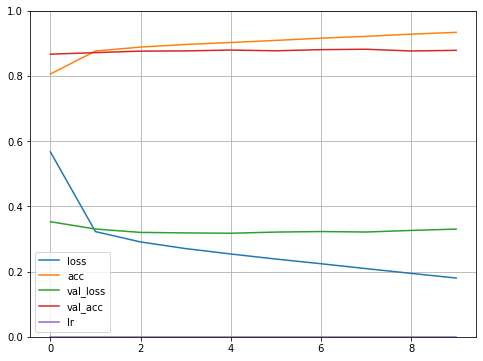

In [26]:
# History 객체에는 훈련 파라미터(history1.params), 에포크(history1.epoch) 및 지표(history1.history)포함
print(history1.history)
# 모델의 Learning curve 그리기
pd.DataFrame(history1.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
# 6) Model Evaluation & Prediction
from tensorflow import keras 
model1 = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/models/1028_1.h5')
pred1 = model1.predict(pad_X_test)
pred1

array([[3.5952899e-01, 5.8342218e-03, 6.3463682e-01],
       [8.8209595e-04, 3.6752455e-05, 9.9908113e-01],
       [3.1644716e-03, 9.9621308e-01, 6.2256609e-04],
       ...,
       [3.1672313e-03, 9.9621791e-01, 6.1486539e-04],
       [9.5807111e-01, 1.6119953e-02, 2.5808990e-02],
       [2.5051165e-01, 1.9814326e-01, 5.5134511e-01]], dtype=float32)

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length = max_len))
model2.add(Conv1D(64, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(3, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           807744    
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 55, 64)            20544     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                     

In [ ]:
model2.compile(optimizer = RMSprop(lr = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])
callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath = '1028_2.h5', monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 64, verbose = 1, validation_split = .2, callbacks=callback_ear)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


500/500 [==============================] - ETA: 0s - loss: 0.6644 - acc: 0.7699
Epoch 1: val_acc improved from -inf to 0.86615, saving model to 1028_2.h5
500/500 [==============================] - 49s 97ms/step - loss: 0.6644 - acc: 0.7699 - val_loss: 0.5448 - val_acc: 0.8661
Epoch 2/15
500/500 [==============================] - ETA: 0s - loss: 0.4332 - acc: 0.8750
Epoch 2: val_acc improved from 0.86615 to 0.87766, saving model to 1028_2.h5
500/500 [==============================] - 48s 97ms/step - loss: 0.4332 - acc: 0.8750 - val_loss: 0.4154 - val_acc: 0.8777
Epoch 3/15
500/500 [==============================] - ETA: 0s - loss: 0.3714 - acc: 0.8878
Epoch 3: val_acc improved from 0.87766 to 0.87841, saving model to 1028_2.h5
500/500 [==============================] - 48s 97ms/step - loss: 0.3714 - acc: 0.8878 - val_loss: 0.3908 - val_acc: 0.8784
Epoch 4/15
500/500 [==============================] - ETA: 0s - loss: 0.3328 - acc: 0.8995
Epoch 4: val_acc improved from 0.87841 to 0.88091,

In [ ]:
model2 = load_model('1028_2.h5')
pred2 = model2.predict(pad_X_test)

In [ ]:
# Model 3
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(16))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           807744    
                                                                 
 conv1d_3 (Conv1D)           (None, 296, 32)           10272     
                                                                 
 conv1d_4 (Conv1D)           (None, 292, 32)           5152      
                                                                 
 conv1d_5 (Conv1D)           (None, 288, 32)           5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 72, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                      

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1028_3.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]
history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=32, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 999/1000 [============================>.] - ETA: 0s - loss: 0.5357 - acc: 0.7834
Epoch 1: val_acc improved from -inf to 0.85414, saving model to 1028_3.h5
1000/1000 [==============================] - 90s 87ms/step - loss: 0.5357 - acc: 0.7834 - val_loss: 0.3903 - val_acc: 0.8541
Epoch 2/30
 999/1000 [============================>.] - ETA: 0s - loss: 0.3517 - acc: 0.8745
Epoch 2: val_acc improved from 0.85414 to 0.87928, saving model to 1028_3.h5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.3518 - acc: 0.8744 - val_loss: 0.3289 - val_acc: 0.8793
Epoch 3/30
 999/1000 [============================>.] - ETA: 0s - loss: 0.3208 - acc: 0.8856
Epoch 3: val_acc did not improve from 0.87928
1000/1000 [==============================] - 87s 87ms/step - loss: 0.3207 - acc: 0.8856 - val_loss: 0.3217 - val_acc: 0.8778
Epoch 4/30
 999/1000 [============================>.] - ETA: 0s - loss: 0.3041 - acc: 0.8896
Epoch 4: val_acc did not improve from 0.87928
1000/1000 [==========

In [ ]:
model3 = load_model('1028_3.h5')
pred3 = model3.predict(pad_X_test)

In [ ]:
# Model 4
model4 = Sequential()
model4.add(Embedding(vocab_size, 32, input_length=max_len))
model4.add(Dropout(0.3))
model4.add(Conv1D(32, 5, activation='relu'))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(32))
model4.add(Dense(3, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 32)           403872    
                                                                 
 dropout_2 (Dropout)         (None, 300, 32)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 296, 32)           5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 74, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                      

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1028_4.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]
history4 = model4.fit(pad_X_train, del_y_train, epochs=30, batch_size=64, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)
model4 = load_model('1028_4.h5')
pred4 = model4.predict(pad_X_test)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


500/500 [==============================] - ETA: 0s - loss: 0.6055 - acc: 0.7640
Epoch 1: val_acc improved from -inf to 0.86940, saving model to 1028_4.h5
500/500 [==============================] - 42s 78ms/step - loss: 0.6055 - acc: 0.7640 - val_loss: 0.3636 - val_acc: 0.8694
Epoch 2/30
500/500 [==============================] - ETA: 0s - loss: 0.3324 - acc: 0.8771
Epoch 2: val_acc improved from 0.86940 to 0.87653, saving model to 1028_4.h5
500/500 [==============================] - 38s 76ms/step - loss: 0.3324 - acc: 0.8771 - val_loss: 0.3276 - val_acc: 0.8765
Epoch 3/30
500/500 [==============================] - ETA: 0s - loss: 0.2951 - acc: 0.8890
Epoch 3: val_acc did not improve from 0.87653
500/500 [==============================] - 38s 76ms/step - loss: 0.2951 - acc: 0.8890 - val_loss: 0.3217 - val_acc: 0.8732
Epoch 4/30
500/500 [==============================] - ETA: 0s - loss: 0.2761 - acc: 0.8948
Epoch 4: val_acc improved from 0.87653 to 0.87991, saving model to 1028_4.h5
500/

In [ ]:
# Model Ensemble
mean_pred = 0.1*pred1 + 0.3*pred2 + 0.2*pred3 + 0.4*pred4
sample_submission['category'] = np.argmax(mean_pred, axis = -1) 
sample_submission.to_csv('ens1028.csv', index=False)